In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def crop_image(image):  # expects grayscale image
    image_copy = image.copy()
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
    # Threshold the image to obtain a binary image (assuming characters are lighter)
    _, binary = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY)
    # Find contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Find the contour with the maximum area
    max_contour = max(contours, key=cv2.contourArea)
    # Get bounding box of the contour
    x, y, w, h = cv2.boundingRect(max_contour)
    # Adjust cropping coordinates to stay within image bounds
    x_min = max(x - 10, 0)
    x_max = min(x + w + 10, gray_image.shape[1])  # Use new_img.shape[1] for width of original image
    y_min = max(y - 10, 0)
    y_max = min(y + h + 10, gray_image.shape[0])  # Use new_img.shape[0] for height of original image

    # Perform cropping with adjusted coordinates
    crop = gray_image[y_min:y_max, x_min:x_max]
    bgr_image = cv2.cvtColor(crop, cv2.COLOR_GRAY2BGR)
    # Resize the cropped image to a standard size (e.g., 28x28)
    standard_size = (224, 224)
    resized_crop = cv2.resize(bgr_image, standard_size, interpolation=cv2.INTER_AREA)
    resized_crop[resized_crop>0]=255
    return resized_crop

(300, 300, 3)


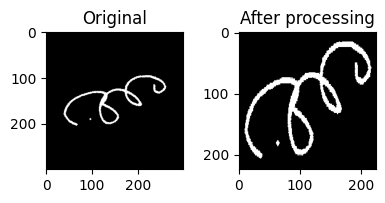

In [6]:
img_path = 'D:\Personal\zDocuments\Lachu\Project_MSc\Data\Data Dumps\PREPROCESSING\SKEW_CORRECTED\pre2_character_3333\pre2_character_3333_236.png'
img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
print(np.shape(img))
crop = crop_image(img)

# Create a figure with two subplots in a single row
plt.figure(figsize=(4, 2))  # Adjust the figure size as needed

# Plot image1 on the first subplot
plt.subplot(1, 2, 1)  # (rows, columns, index)
plt.imshow(img)
plt.title('Original')

# Plot image2 on the second subplot
plt.subplot(1, 2, 2)
plt.imshow(crop)
plt.title('After processing')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

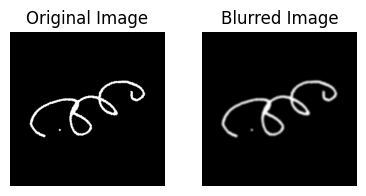

In [56]:
# Define Gaussian blur parameters
kernel_size = 5  # Kernel size (should be an odd number)
sigma = 5  # Standard deviation (automatically calculated from kernel size if sigma = 0)

# Apply Gaussian blur
blurred_image = cv2.GaussianBlur(img, (kernel_size, kernel_size), sigma)

# Plotting using matplotlib
plt.figure(figsize=(4, 2))

# Plot original image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

# Plot blurred image
plt.subplot(1, 2, 2)
plt.imshow(blurred_image)
plt.title('Blurred Image')
plt.axis('off')

plt.tight_layout()
plt.show()


In [59]:
# # SKEW CORRECTION ALL IMAGES

# # Input and output directories
# input_folder = 'D:\Personal\zDocuments\Lachu\Project_MSc\Data\Data Dumps\PREPROCESSING\SKEW_CORRECTED'
# output_folder = 'D:\Personal\zDocuments\Lachu\Project_MSc\Data\Data Dumps\PREPROCESSING\CROPPED'

# # Traverse through directories and process images
# for root, dirs, files in os.walk(input_folder):
#     for subdir in dirs:
#         input_subdir = os.path.join(root, subdir)
#         output_subdir = os.path.join(output_folder, 'pre3_' + subdir[5:])
        
#         # Create output subdirectory if it doesn't exist
#         if not os.path.exists(output_subdir):
#             os.makedirs(output_subdir)

#         # Process images in the subdirectory
#         for file in os.listdir(input_subdir):
#             if file.endswith('.png') or file.endswith('.jpg'):
#                 img_path = os.path.join(input_subdir, file)
#                 output_image_path = os.path.join(output_subdir, 'pre3_' + file[5:])
#                 img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)

#                 # Cropping
#                 cropped_image = crop_image(img)
                
#                 # Save the corrected image
#                 cv2.imwrite(output_image_path, (cropped_image).astype(np.uint8))
#                 # print(f"{output_image_path} saved.")

# print("Cropping process completed.")

Cropping process completed.
